In [1]:
__author__ = 'Alysa Obertas'
__email__ = 'obertas@astro.utoronto.ca'

import numpy as np
import rebound
import matplotlib.pyplot as plt
import matplotlib
import random

In [3]:
#######################################################################
## read initial condition file

infile = "../generate-and-run-systems/initial_conditions.npz"

ic = np.load(infile)

P_sort = ic['P_sort'] # periods for Nsims test particles, sorted in ascending order (REBOUND time)
e_sort = ic['e_sort'] # eccentricities for Nsims test particles, sorted in ascending order
inc_sort = ic['inc_sort'] # inclinations for Nsims test particles, sorted in ascending order (radians)
pomega_sort = ic['pomega_sort'] # longitudes of periapsis for Nsims test particles, sorted in ascending order (radians)

In [6]:
#######################################################################
## read spock probabilities file

outfile = "../spock-stability/probs-all.npz"

spock_probs = np.load(outfile)

probs = spock_probs['probs']

(0.004757599935263487, 0.052491651717759796)

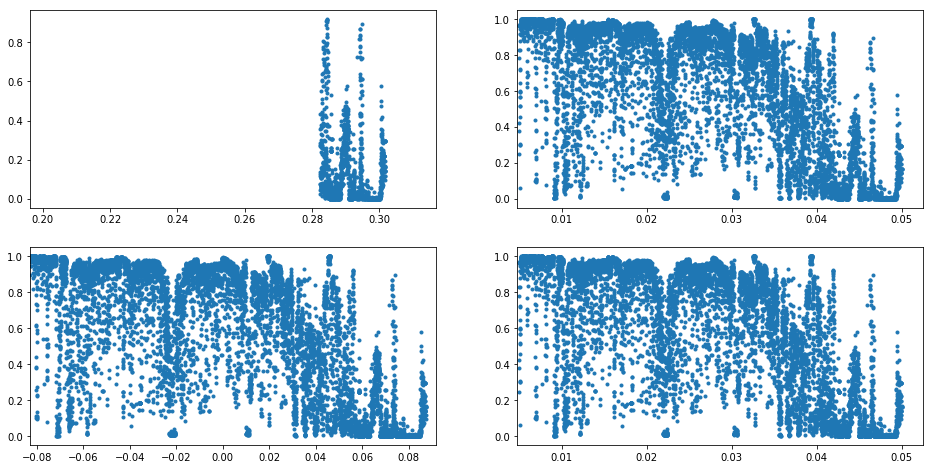

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

ax[0][0].plot(P_sort[np.logical_and(inc_sort >= 3 * np.pi/180, inc_sort < 5 * np.pi/180)], probs[np.logical_and(inc_sort >= 3 * np.pi/180, inc_sort < 5 * np.pi/180)], '.')
ax[0][0].set_xlim(0.95*np.min(P_sort), 1.05*np.max(P_sort))

ax[0][1].plot(e_sort, probs, '.')
ax[0][1].set_xlim(0.95*np.min(e_sort), 1.05*np.max(e_sort))

ax[1][0].plot(inc_sort, probs, '.')
ax[1][0].set_xlim(0.95*np.min(inc_sort), 1.05*np.max(inc_sort))

ax[1][1].plot(pomega_sort, probs, '.')
ax[1][1].set_xlim(0.95*np.min(pomega_sort), 1.05*np.max(pomega_sort))